In [23]:

import seaborn as sns

from sklearn import datasets
import matplotlib.pyplot as plt

faces = datasets.fetch_olivetti_faces()


In [24]:
faces.keys()

dict_keys(['data', 'images', 'target', 'DESCR'])

In [25]:
print(faces.DESCR)

.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: https://cam-orl.co.uk/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position
    (with tolerance for some side movement).

**Data Set Characteristics:**

=================   =====================
Classes              

In [26]:
faces.images.shape

(400, 64, 64)

In [27]:
faces.target.shape
# len(faces.target)

(400,)

In [28]:
faces.images[0].shape

(64, 64)

In [29]:
faces.images[0].round(2)

array([[0.31, 0.37, 0.42, ..., 0.37, 0.33, 0.31],
       [0.34, 0.4 , 0.44, ..., 0.37, 0.34, 0.31],
       [0.34, 0.42, 0.45, ..., 0.38, 0.34, 0.3 ],
       ...,
       [0.21, 0.21, 0.22, ..., 0.15, 0.17, 0.17],
       [0.2 , 0.21, 0.21, ..., 0.15, 0.16, 0.17],
       [0.2 , 0.21, 0.2 , ..., 0.15, 0.16, 0.16]], dtype=float32)

 ## ws02

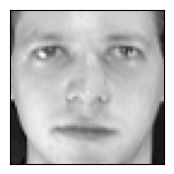

In [30]:
import matplotlib.pyplot as plt

img = faces.images[0]
plt.figure(figsize=(2, 2))
plt.imshow(img, cmap=plt.cm.gray)
plt.tick_params(bottom=False, left=False, labelleft=False, labelbottom=False)
plt.show()

In [31]:
%matplotlib inline
from matplotlib import pyplot as plt

def visual_multi(i):
    '''Plots 15 faces, starting with digit i'''
    nplots = 50
    fig = plt.figure(figsize=(8, 5)) 
    
    for j in range(nplots):
        plt.subplot(5, 10, j+1)
        plt.imshow(faces.images[i+j], cmap=plt.cm.gray)
        plt.title(faces.target[i+j])
        plt.tick_params(bottom=False, left=False, labelleft=False, labelbottom=False)
    plt.show()

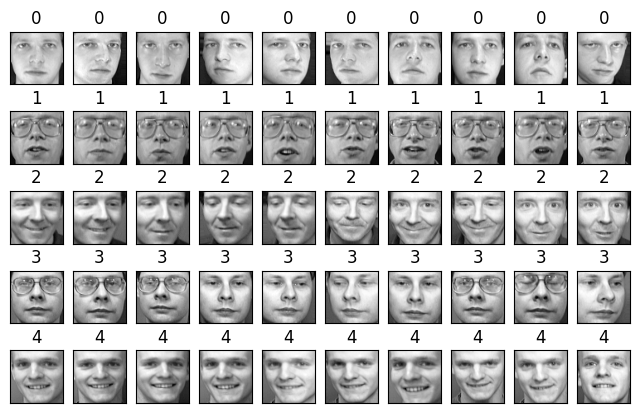

In [32]:
visual_multi(0)    

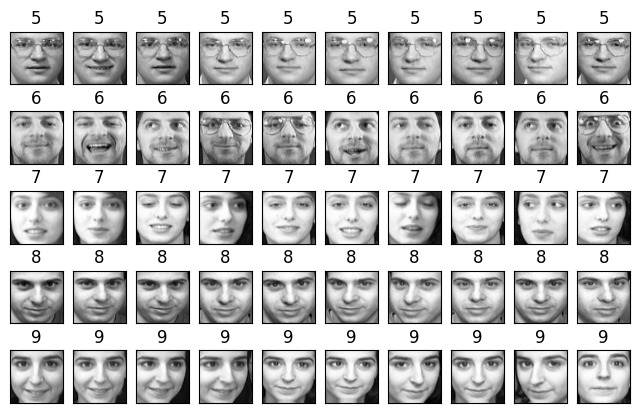

In [33]:
visual_multi(50) 

## ws03

In [34]:
n_samples = len(faces.images) 
X = faces.images
y = faces.target
X = X.reshape(n_samples, -1)
X.shape, y.shape

((400, 4096), (400,))

In [35]:
n_samples = 60
Xn = faces.images[:n_samples]

Xn.shape

(60, 64, 64)

In [36]:
X = Xn.reshape(n_samples, -1)
X.shape

(60, 4096)

In [37]:
y = faces.target[:n_samples]
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5])

In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test,y_train,y_test = train_test_split(X, y, test_size=0.25, random_state=2) # 
X_train.shape , X_test.shape

((45, 4096), (15, 4096))

## ws04

In [39]:
from sklearn import svm 
model = svm.SVC(gamma='scale') 

model.fit(X_train, y_train)

SVC()

In [40]:
y_pred = model.predict(X_test)

In [41]:
y_pred[:]

array([3, 0, 4, 5, 2, 4, 0, 2, 5, 3, 0, 3, 4, 2, 0])

In [42]:
y_test[:]

array([3, 0, 4, 5, 2, 4, 3, 2, 4, 3, 0, 3, 4, 2, 0])

In [43]:
from sklearn.metrics import accuracy_score # may use score of the model
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# y_pred = model.predict(X_test)


print('Accuracy Score: {:.4f}'.format(accuracy_score(y_test, y_pred)))
class_names =['Alex','Cala','Dana','Eva','Fox']  # 

print(classification_report(y_test, y_pred, target_names=class_names))

cm = confusion_matrix(y_test, y_pred)
print(cm)

Accuracy Score: 0.8667
              precision    recall  f1-score   support

        Alex       0.75      1.00      0.86         3
        Cala       1.00      1.00      1.00         3
        Dana       1.00      0.75      0.86         4
         Eva       1.00      0.75      0.86         4
         Fox       0.50      1.00      0.67         1

    accuracy                           0.87        15
   macro avg       0.85      0.90      0.85        15
weighted avg       0.92      0.87      0.87        15

[[3 0 0 0 0]
 [0 3 0 0 0]
 [1 0 3 0 0]
 [0 0 0 3 1]
 [0 0 0 0 1]]


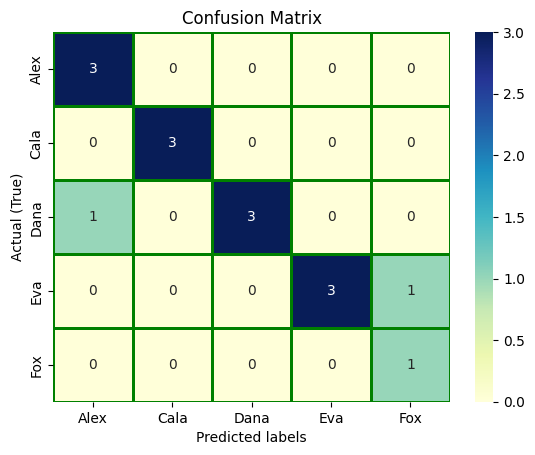

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

ax = plt.subplot()
sns.heatmap(cm, annot=True, ax=ax, linewidths=1, linecolor='g', cmap="YlGnBu") #annot=True to annotate cells


ax.set_xlabel('Predicted labels')
ax.set_ylabel('Actual (True)'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(class_names)
ax.yaxis.set_ticklabels(class_names)
plt.show()

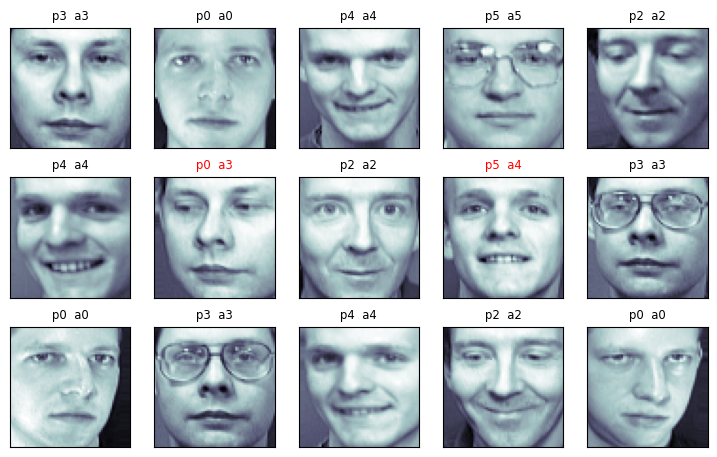

In [45]:
import numpy as np

fig = plt.figure(figsize=(9, 5.5))
# y_pred = clf.predict(X_test)

for i in range(15): 
    ax = fig.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(X_test[i].reshape(faces.images[0].shape),
              cmap=plt.cm.bone)
    color = ('black' if y_pred[i] == y_test[i] else 'red')
    title = 'p{}  a{}' .format(y_pred[i] , y_test[i])
    ax.set_title(title ,  fontsize='small', color=color)
